In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings("ignore")
import ast 
import nltk

In [2]:
movie = pd.read_csv("tmdb_5000_movies.csv")
credit = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movie = movie.merge(credit,on = "title")

In [4]:
movie

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

In [5]:
movie = movie[["movie_id","title","genres","overview","keywords","cast","crew","vote_average","release_date","revenue"]]


In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4809 non-null   int64  
 1   title         4809 non-null   object 
 2   genres        4809 non-null   object 
 3   overview      4806 non-null   object 
 4   keywords      4809 non-null   object 
 5   cast          4809 non-null   object 
 6   crew          4809 non-null   object 
 7   vote_average  4809 non-null   float64
 8   release_date  4808 non-null   object 
 9   revenue       4809 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 375.8+ KB


In [7]:
movie.isnull().sum()

movie_id        0
title           0
genres          0
overview        3
keywords        0
cast            0
crew            0
vote_average    0
release_date    1
revenue         0
dtype: int64

In [8]:
movie= movie.dropna()

In [9]:
movie.isna().sum()

movie_id        0
title           0
genres          0
overview        0
keywords        0
cast            0
crew            0
vote_average    0
release_date    0
revenue         0
dtype: int64

In [10]:
movie.head()

,movie_id,title,genres,overview,keywords,cast,crew,vote_average,release_date,revenue
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,2009-12-10,2787965087
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,2007-05-19,961000000
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,2015-10-26,880674609
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,2012-07-16,1084939099
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,2012-03-07,284139100


In [1]:
# using ast.literal_eval to get list from string 

In [11]:
def convert(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i["name"])
    return l    

In [12]:
movie["genres"] = movie["genres"].apply(convert)
movie["keywords"] = movie["keywords"].apply(convert)

In [13]:
def convert1(obj):
    l=[]
    counter = 0
    for i in ast.literal_eval(obj):
        if counter <3:
            l.append(i["name"])
            counter += 1
        
    return l    

In [14]:
movie["cast"] = movie["cast"].apply(convert1)

In [15]:
def convert2(obj):
    l=[]
    for n in ast.literal_eval(obj):
        if n["job"] ==  "Director":
            l.append(n["name"])
    return l        

In [16]:
movie["director"] = movie["crew"].apply(convert2)

In [17]:
movie.head()

,movie_id,title,genres,overview,keywords,cast,crew,vote_average,release_date,revenue,director
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,2009-12-10,2787965087,[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,2007-05-19,961000000,[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,2015-10-26,880674609,[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,2012-07-16,1084939099,[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,2012-03-07,284139100,[Andrew Stanton]


In [18]:
movie["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [2]:
# converting overview to list 

In [19]:
movie["overview"] = movie["overview"].apply(lambda x: x.split())

In [ ]:
# removing space between name to get unique name to help model to not

In [20]:
# removing " "
movie["genres"] =movie["genres"].apply(lambda x: [i.replace (" ","") for i in x])
movie["keywords"] = movie["keywords"].apply(lambda x: [i.replace(" ","") for i in x])
movie["cast"] = movie["cast"].apply(lambda x: [i.replace(" ","") for i in x])
movie["director"] = movie["director"].apply(lambda x: [i.replace(" ","") for i in x])

In [21]:
movie["genres"][0]

['Action', 'Adventure', 'Fantasy', 'ScienceFiction']

In [22]:
movie.isnull().sum()

movie_id        0
title           0
genres          0
overview        0
keywords        0
cast            0
crew            0
vote_average    0
release_date    0
revenue         0
director        0
dtype: int64

In [23]:
movie["tags"] = movie["overview"] + movie["keywords"] + movie["genres"] + movie["cast"] + movie["director"]

In [24]:
new_df = movie[["movie_id","title","tags"]]

In [25]:
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [26]:
new_df["tags"] = new_df["tags"].apply(lambda x : " ".join(x))

In [27]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


### To normalize words that mean similar things

In [28]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
def steam(text):
    y =[]
    for i in text.split():
        y.append(ps.stem(i))

    return  " ".join(y)


In [30]:
new_df["tags"] = new_df["tags"].apply(steam)

In [ ]:
# calculate similarity between items based on their attributes.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words="english")

In [64]:
# we get Sparse Data here .so converting it to np.array

In [32]:
vector = cv.fit_transform(new_df["tags"]).toarray()

In [33]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [35]:
new_df["tags"][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d action adventur fantasi sciencefict samworthington zoesaldana sigourneyweav jamescameron'

In [65]:
# finding similarity between movies

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity = cosine_similarity(vector)

In [38]:
similarity[2]

array([0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
       0.        ])

In [69]:
#sorted(list(similarity[1]),reverse= True) this we loose the index of simliarity and new index will get based on sorted similarity
sorted(list(enumerate(similarity[119])),reverse =True,key = lambda x: x[1])[1:6]

[(65, np.float64(0.40218090755486674)),
 (1361, np.float64(0.35434169344615046)),
 (1360, np.float64(0.3340765523905305)),
 (3, np.float64(0.3177444546511212)),
 (3295, np.float64(0.3120099844792576))]

In [66]:
# recommending movie

In [40]:
def recommend(movie):
    movie_index =new_df[new_df["title"] == movie].index[0]
    distance = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)),reverse =True , key = lambda x : x[1])[1:6]
    for i in movie_list:
        print(new_df.iloc[i[0]].title)
    

In [74]:
new_df[new_df["title"] == "Avatar"].index[0]

np.int64(0)

In [42]:
new_df.iloc[0].title

'Avatar'

In [43]:
recommend("Batman Begins")

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [44]:
movie_name = input("enter movie name")
recommend(movie_name)

enter movie name The Dark Knight


The Dark Knight Rises
Batman Begins
Batman Returns
Batman Forever
Batman


In [45]:
movie_name = input("enter movie name")
recommend(movie_name)

enter movie name 10th & Wolf


Torque
West Side Story
Exiled
The Outsiders
The Lone Ranger


In [67]:
movie.head(4)

,movie_id,title,genres,overview,keywords,cast,crew,vote_average,release_date,revenue,director,tags,year,year_bins,revenue_bins
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",popular,2009-12-10,2787965087,[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin...",2009,2000-2025,1B-3B
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",popular,2007-05-19,961000000,[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d...",2007,2000-2025,100M-1B
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",above_average,2015-10-26,880674609,[SamMendes],"[A, cryptic, message, from, Bond’s, past, send...",2015,2000-2025,100M-1B
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",popular,2012-07-16,1084939099,[ChristopherNolan],"[Following, the, death, of, District, Attorney...",2012,2000-2025,1B-3B


In [47]:
movie["vote_average"].describe()

count    4805.000000
mean        6.094527
std         1.187720
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [48]:

bins =[0.000000,5.600000,6.200000,6.800000,10.000000]
labels = ["below_average","average","above_average","popular"]
movie["vote_average"] = pd.cut(movie["vote_average"],bins=bins,labels =labels)
    

In [49]:
movie.head(3)

,movie_id,title,genres,overview,keywords,cast,crew,vote_average,release_date,revenue,director,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",popular,2009-12-10,2787965087,[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",popular,2007-05-19,961000000,[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",above_average,2015-10-26,880674609,[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."


In [50]:
movie["release_date"] =pd.to_datetime(movie["release_date"])
movie["year"] = movie["release_date"].dt.year

In [51]:

bins = [1900, 1926, 1951, 1976, 2001, 2026]
labels = ["1900-1925","1926-1950","1951-1975","1976-2000","2000-2025"]
movie["year_bins"] = pd.cut(movie["year"],bins=bins,labels=labels)

In [52]:
bins = [ 100_000, 1_000_000, 10_000_000, 100_000_000, 1_000_000_000, 3_000_000_000]
labels = [  "100k-1M", "1M-10M", "10M-100M", "100M-1B", "1B-3B"]

movie["revenue_bins"] = pd.cut(movie["revenue"], bins=bins, labels=labels)


In [54]:
movie_genre = pd.DataFrame(movie.explode("genres").reset_index(drop=True))

## visulaization

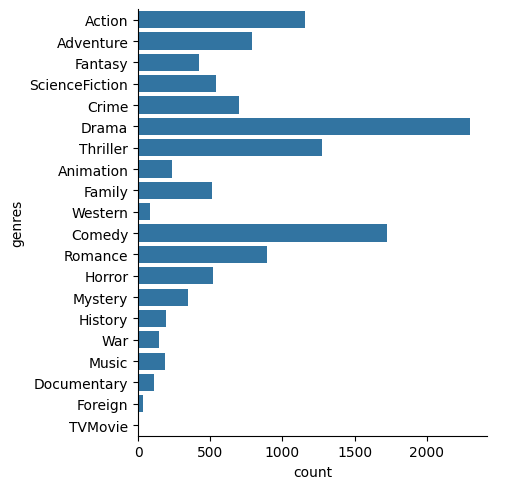

In [55]:
# genres
sns.catplot(movie_genre,kind="count",y ="genres")

<Axes: xlabel='year_bins', ylabel='count'>

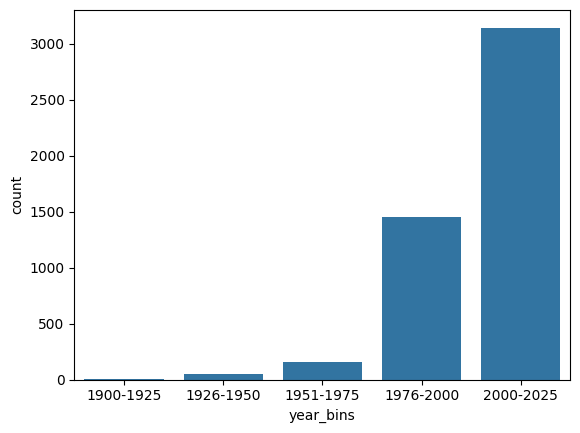

In [56]:
sns.countplot(movie,x="year_bins")

<Axes: xlabel='revenue_bins', ylabel='count'>

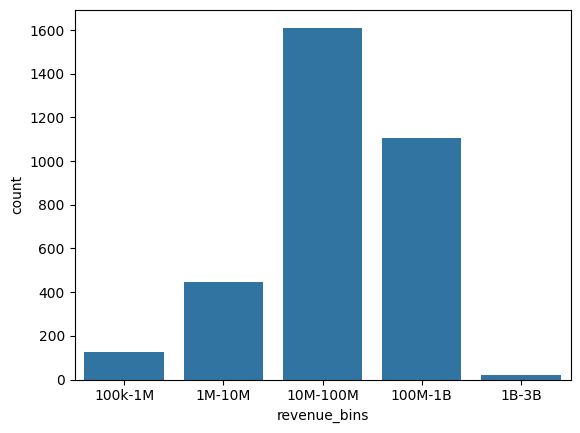

In [57]:
sns.countplot(movie,x="revenue_bins")

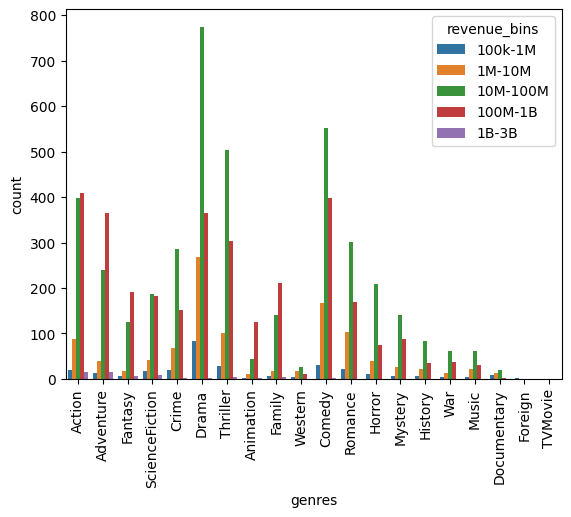

In [63]:
sns.countplot(movie_genre,x="genres",hue="revenue_bins")
plt.xticks(rotation=90)
plt.show()